<a href="https://colab.research.google.com/github/Daniel0507-2001/Procesamiento-digital-de-se-ales/blob/main/ecualizador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

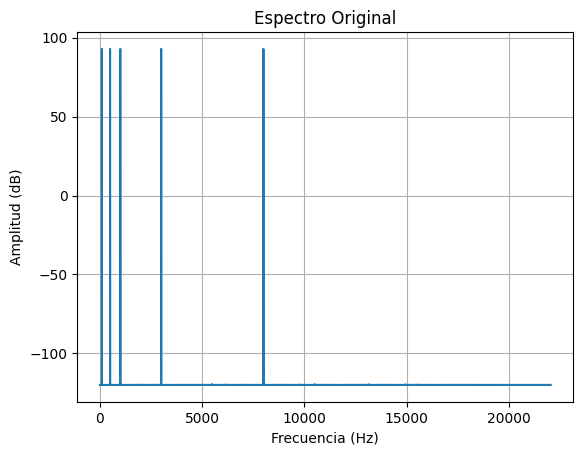

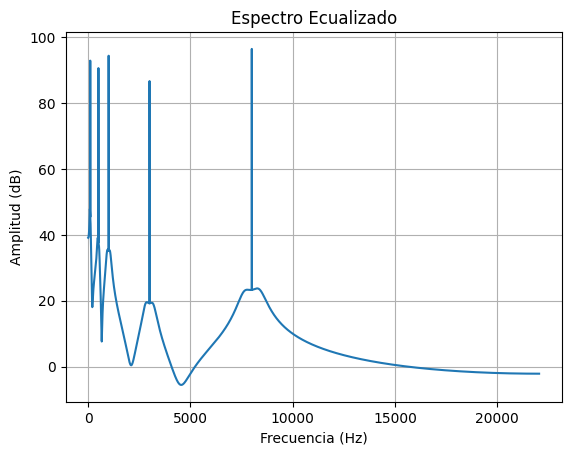

In [1]:
import numpy as np
from scipy.signal import iirfilter, lfilter
import matplotlib.pyplot as plt

def crear_filtro(fc, bw, fs, filtro_tipo='band'):
    """
    Crea un filtro digital (biquad) para una banda específica.

    :param fc: Frecuencia central de la banda (Hz).
    :param bw: Ancho de banda de la banda (Hz).
    :param fs: Frecuencia de muestreo (Hz).
    :param filtro_tipo: Tipo de filtro ('band' para pasa banda).
    :return: Coeficientes del filtro (b, a).
    """
    Wn = [(fc - bw / 2) / (fs / 2), (fc + bw / 2) / (fs / 2)]
    b, a = iirfilter(
        N=2,
        Wn=Wn,
        btype=filtro_tipo,
        ftype='butter'
    )
    return b, a

def procesar_banda(senal, b, a, ganancia):
    """
    Procesa una señal en una banda específica y ajusta la ganancia.

    :param senal: Señal de entrada (array).
    :param b: Coeficientes del filtro (b).
    :param a: Coeficientes del filtro (a).
    :param ganancia: Ganancia para esta banda (factor).
    :return: Señal procesada.
    """
    filtrada = lfilter(b, a, senal)
    salida = ganancia * filtrada
    return salida

def generar_ecualizador_multibanda(senal, parametros_bandas, fs):
    """
    Genera un ecualizador multibanda aplicando varias bandas de procesamiento.

    :param senal: Señal de entrada (array).
    :param parametros_bandas: Lista de parámetros [(fc, bw, ganancia), ...].
    :param fs: Frecuencia de muestreo (Hz).
    :return: Señal ecualizada.
    """
    salida_total = np.zeros_like(senal)
    for fc, bw, ganancia in parametros_bandas:
        b, a = crear_filtro(fc, bw, fs)
        salida_banda = procesar_banda(senal, b, a, ganancia)
        salida_total += salida_banda
    return salida_total

def graficar_espectro(senal, fs, titulo):
    """
    Grafica el espectro de una señal.

    :param senal: Señal de entrada (array).
    :param fs: Frecuencia de muestreo (Hz).
    :param titulo: Título del gráfico.
    """
    freqs = np.fft.rfftfreq(len(senal), 1 / fs)
    espectro = np.abs(np.fft.rfft(senal))
    plt.figure()
    plt.plot(freqs, 20 * np.log10(espectro + 1e-6))  # Escala logarítmica
    plt.title(titulo)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.grid()
    plt.show()

# Parámetros iniciales
fs = 44100  # Frecuencia de muestreo (Hz)
duracion = 2  # Duración de la señal (segundos)
frecuencias = [100, 500, 1000, 3000, 8000]  # Frecuencias de prueba (Hz)

# Generar una señal de prueba (suma de senos)
t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)
senal = sum(np.sin(2 * np.pi * f * t) for f in frecuencias)

# Parámetros de las bandas [(fc, bw, ganancia), ...]
parametros_bandas = [
    (100, 50, 1.0),    # Banda 1
    (500, 100, 0.8),   # Banda 2
    (1000, 200, 1.2),  # Banda 3
    (3000, 500, 0.5),  # Banda 4
    (8000, 1000, 1.5)  # Banda 5
]

# Procesar la señal con el ecualizador
senal_ecualizada = generar_ecualizador_multibanda(senal, parametros_bandas, fs)

# Graficar espectros
graficar_espectro(senal, fs, 'Espectro Original')
graficar_espectro(senal_ecualizada, fs, 'Espectro Ecualizado')
